In [1]:
# import libraries

import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Download necessary NLTK datasets

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
# Read the dataset

df = pd.read_csv("/content/HatespeechKenya.csv", sep=";", header=None, on_bad_lines='skip')


In [4]:
# Sample dataset preview
df.head()

,0
0,tweet
1,";2017-10-18 11:04;0;0;""That #ShangweVedio shou..."
2,";2017-10-18 09:15;0;1;""they wrote letters to i..."
3,";2017-10-18 09:06;0;2;""Akombe was a nasa mole ..."
4,";2017-10-04 12:24;0;0;""@paulinenjoroge @OleItu..."


In [5]:
# Extracting the tweet text (1st column of the CSV, index 0)
tweets = df[0]  # Column index 0 for tweet text


In [6]:
# Step 1: Tokenization

def tokenize_text(text):
    # Tokenizer that removes punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

tokens_before = tweets.apply(tokenize_text)

In [7]:
# Step 2: WordCloud before preprocessing

def generate_wordcloud(tokens):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

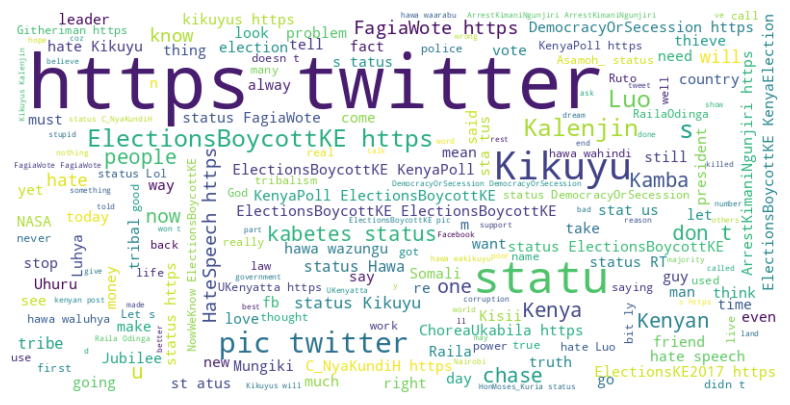

In [8]:
# Join all tokens before preprocessing to generate the word cloud

all_tokens_before = [token for sublist in tokens_before for token in sublist]
generate_wordcloud(all_tokens_before)

In [9]:
# Step 3: Removing stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

tokens_after_stopwords = tokens_before.apply(remove_stopwords)
# Assign the result of removing stop words to 'tokens_after_stopwords'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Step 4: Stemming
def apply_stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

tokens_after_stemming = tokens_after_stopwords.apply(apply_stemming)
# Now, 'tokens_after_stopwords' is defined and can be used

In [11]:
# Step 5: Lemmatization
def apply_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

tokens_after_lemmatization = tokens_after_stemming.apply(apply_lemmatization)


In [12]:
# Step 6: POS Tagging
import nltk

# Download the necessary resource if it hasn't been downloaded yet
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng/')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')

from nltk import pos_tag # Make sure pos_tag is imported

def pos_tagging(tokens):
    return pos_tag(tokens)

pos_tags = tokens_after_lemmatization.apply(pos_tagging)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [16]:
# Download the necessary resource
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


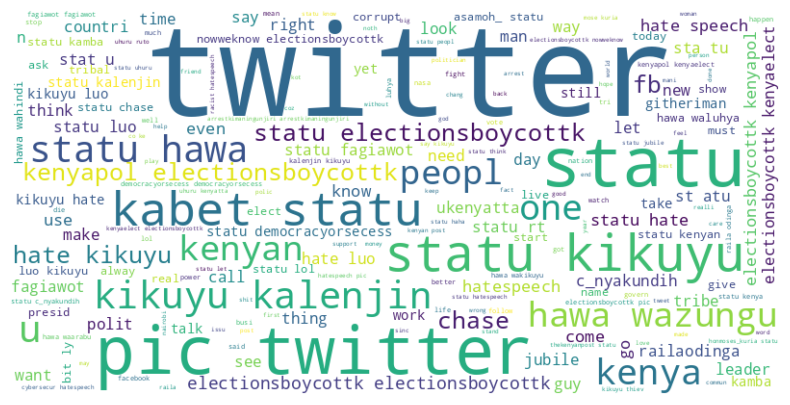

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker_tab/english_ace_multiclass/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [20]:
# Download the necessary resource
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Step 8: WordCloud after preprocessing
import nltk
from nltk.chunk import ne_chunk

all_tokens_after = [token for sublist in tokens_after_lemmatization for token in sublist]
generate_wordcloud(all_tokens_after)

# Perform Named Entity Recognition (Chunking)
# This was missing in your original code, causing the error
chunked = tokens_after_lemmatization.apply(lambda tokens: ne_chunk(nltk.pos_tag(tokens)))


# Print the results for sample tweets
print("Original Tweet:", tweets.iloc[0])
print("Tokens before preprocessing:", tokens_before.iloc[0])
print("Tokens after stopword removal:", tokens_after_stopwords.iloc[0])
print("Tokens after stemming:", tokens_after_stemming.iloc[0])
print("Tokens after lemmatization:", tokens_after_lemmatization.iloc[0])
print("POS tags:", pos_tags.iloc[0])
print("Named Entity Recognition (Chunking) results:", chunked.iloc[0])
